In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [4]:
train=pd.read_csv('C:\\Users\\Admin\\Desktop\\Capstone project\\train walmart.csv')
test=pd.read_csv('C:\\Users\\Admin\\Desktop\\Capstone project\\test walmart.csv')

In [5]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [7]:
train['Date']=pd.to_datetime(train['Date'])
test['Date']=pd.to_datetime(test['Date'])

In [8]:
train['Month']=train['Date'].dt.month
train['Year']=train['Date'].dt.year
train['Dayofweek']=train['Date'].dt.dayofweek

In [9]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Month,Year,Dayofweek
0,1,1,2010-02-05,24924.50,False,2,2010,4
1,1,1,2010-02-12,46039.49,True,2,2010,4
2,1,1,2010-02-19,41595.55,False,2,2010,4
3,1,1,2010-02-26,19403.54,False,2,2010,4
4,1,1,2010-03-05,21827.90,False,3,2010,4


In [10]:
test['Month']=test['Date'].dt.month
test['Year']=test['Date'].dt.year
test['Dayofweek']=test['Date'].dt.dayofweek

In [11]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Month,Year,Dayofweek
0,1,1,2010-02-05,24924.50,False,2,2010,4
1,1,1,2010-02-12,46039.49,True,2,2010,4
2,1,1,2010-02-19,41595.55,False,2,2010,4
3,1,1,2010-02-26,19403.54,False,2,2010,4
4,1,1,2010-03-05,21827.90,False,3,2010,4


In [12]:
train.set_index('Date',inplace=True)
test.set_index('Date',inplace=True)

In [13]:
sales=train.groupby('Date')['Weekly_Sales'].sum()
sales.head()

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
Name: Weekly_Sales, dtype: float64

Text(0, 0.5, 'Weekly_Sales')

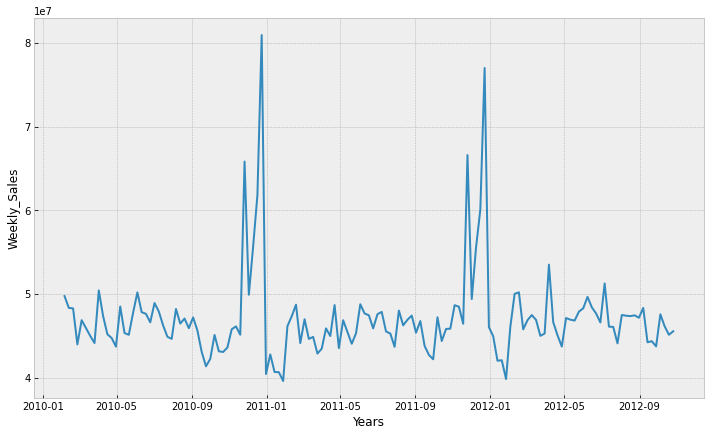

In [14]:
plt.figure(figsize=(12, 7))
plt.plot(sales)
plt.xlabel('Years')
plt.ylabel('Weekly_Sales')

In [15]:
sales_mean=sales.rolling(window=12).mean().round(4)
sales_std=sales.rolling(window=12).std().round(4)
print(sales_mean,sales_std)

Date
2010-02-05             NaN
2010-02-12             NaN
2010-02-19             NaN
2010-02-26             NaN
2010-03-05             NaN
                  ...     
2012-09-28    4.614606e+07
2012-10-05    4.626830e+07
2012-10-12    4.627405e+07
2012-10-19    4.635949e+07
2012-10-26    4.619767e+07
Name: Weekly_Sales, Length: 143, dtype: float64 Date
2010-02-05             NaN
2010-02-12             NaN
2010-02-19             NaN
2010-02-26             NaN
2010-03-05             NaN
                  ...     
2012-09-28    1.630511e+06
2012-10-05    1.680931e+06
2012-10-12    1.680270e+06
2012-10-19    1.582753e+06
2012-10-26    1.556161e+06
Name: Weekly_Sales, Length: 143, dtype: float64


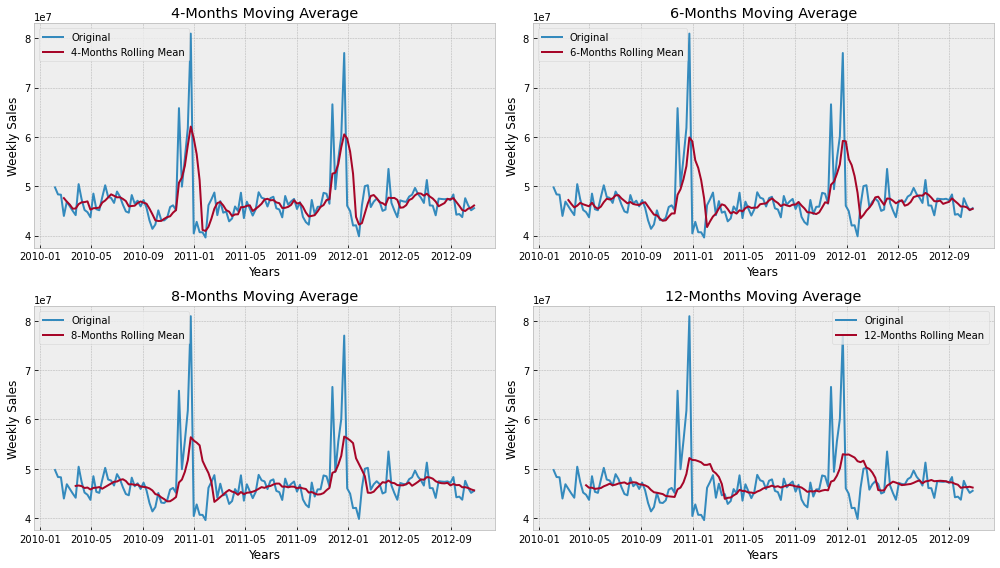

In [16]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(sales.index, sales, label='Original')
axes[0][0].plot(sales.index, sales.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Weekly Sales")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(sales.index, sales, label='Original')
axes[0][1].plot(sales.index, sales.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Weekly Sales")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(sales.index, sales, label='Original')
axes[1][0].plot(sales.index, sales.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Weekly Sales")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(sales.index, sales, label='Original')
axes[1][1].plot(sales.index, sales.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Weekly Sales")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

In [17]:
monthly_sales = pd.pivot_table(train, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales = monthly_sales.reindex(index = [1,2,3,4,5,6,7,8,9,10,11,12])
monthly_sales

Year,2010,2011,2012
Month,,,
1,NaN,13997.773991,14252.698030
2,16076.778701,15870.141203,16077.647710
3,15432.626612,15182.972005,15589.875454
4,15745.551340,15361.895495,15890.394983
5,15996.481695,15367.864481,15967.389566
6,16486.250953,16188.124643,16309.247563
7,15972.812718,15724.738313,15893.325343
8,16171.689295,16030.542478,16002.348874
9,15120.086691,14961.570247,15239.205709


<AxesSubplot:xlabel='Month'>

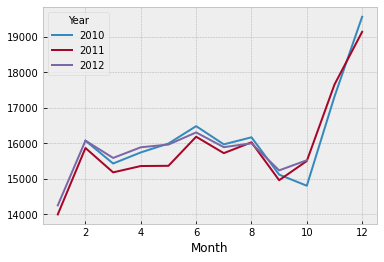

In [18]:
monthly_sales.plot()

In [26]:
!pip install prophet

  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached holidays-0.21.13-py3-none-any.whl (378 kB)


In [27]:
from prophet import Prophet

In [28]:
train=train.groupby('Date')[['Weekly_Sales']].sum()

In [29]:
train['ds'] = train.index

In [30]:
train.head()

,Weekly_Sales,ds
Date,,
2010-02-05,49750740.50,2010-02-05
2010-02-12,48336677.63,2010-02-12
2010-02-19,48276993.78,2010-02-19
2010-02-26,43968571.13,2010-02-26
2010-03-05,46871470.30,2010-03-05


In [31]:
train = train[['ds', 'Weekly_Sales']].rename(columns={'ds': 'ds', 'Weekly_Sales': 'y'})

In [39]:
sales_model = Prophet(seasonality_mode='additive',interval_width=0.50)
sales_model.fit(train)

03:28:44 - cmdstanpy - INFO - Chain [1] start processing
03:28:44 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
sales_forecast = sales_model.make_future_dataframe(periods=12, freq='MS')
sales_forecast = sales_model.predict(sales_forecast)

In [41]:
sales_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,4.704446e+07,4.561857e+07,5.050911e+07,4.704446e+07,4.704446e+07,7.137411e+05,7.137411e+05,7.137411e+05,7.137411e+05,7.137411e+05,7.137411e+05,0.0,0.0,0.0,4.775820e+07
1,2010-02-12,4.704531e+07,4.610711e+07,5.072638e+07,4.704531e+07,4.704531e+07,1.430231e+06,1.430231e+06,1.430231e+06,1.430231e+06,1.430231e+06,1.430231e+06,0.0,0.0,0.0,4.847554e+07
2,2010-02-19,4.704616e+07,4.489464e+07,4.949891e+07,4.704616e+07,4.704616e+07,5.209756e+04,5.209756e+04,5.209756e+04,5.209756e+04,5.209756e+04,5.209756e+04,0.0,0.0,0.0,4.709826e+07
3,2010-02-26,4.704701e+07,4.363001e+07,4.826050e+07,4.704701e+07,4.704701e+07,-1.163954e+06,-1.163954e+06,-1.163954e+06,-1.163954e+06,-1.163954e+06,-1.163954e+06,0.0,0.0,0.0,4.588306e+07
4,2010-03-05,4.704786e+07,4.333875e+07,4.789115e+07,4.704786e+07,4.704786e+07,-1.439623e+06,-1.439623e+06,-1.439623e+06,-1.439623e+06,-1.439623e+06,-1.439623e+06,0.0,0.0,0.0,4.560824e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2013-06-01,4.855482e+07,4.665154e+07,5.116385e+07,4.853713e+07,4.857508e+07,2.067949e+05,2.067949e+05,2.067949e+05,2.067949e+05,2.067949e+05,2.067949e+05,0.0,0.0,0.0,4.876161e+07
151,2013-07-01,4.860649e+07,4.663052e+07,5.142768e+07,4.858515e+07,4.863086e+07,4.508045e+05,4.508045e+05,4.508045e+05,4.508045e+05,4.508045e+05,4.508045e+05,0.0,0.0,0.0,4.905729e+07
152,2013-08-01,4.865987e+07,4.518429e+07,4.939423e+07,4.863432e+07,4.868847e+07,-1.414896e+06,-1.414896e+06,-1.414896e+06,-1.414896e+06,-1.414896e+06,-1.414896e+06,0.0,0.0,0.0,4.724498e+07
153,2013-09-01,4.871326e+07,4.631290e+07,5.096069e+07,4.868365e+07,4.874639e+07,-8.838561e+04,-8.838561e+04,-8.838561e+04,-8.838561e+04,-8.838561e+04,-8.838561e+04,0.0,0.0,0.0,4.862488e+07


<Figure size 1296x432 with 0 Axes>

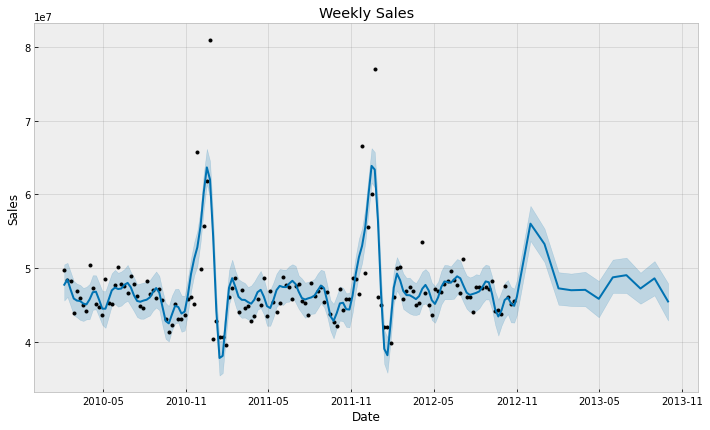

In [42]:
plt.figure(figsize=(18, 6))
sales_model.plot(sales_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Weekly Sales');

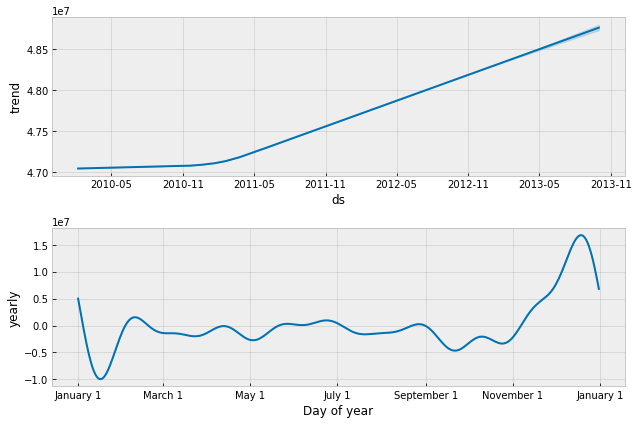

In [43]:
sales_model.plot_components(sales_forecast);

Good to see that the weekly sales have been linearly increasing over time
The worst months for weekly sales are January,October. The best months for weekly sales are June,November and December

Stationary Data for ARIMA models
Dickey-Fuller Test

Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [44]:
from statsmodels.tsa.stattools import adfuller
adfuller(sales)

(-5.9082979571863286,
 2.6759791589861074e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 4314.46014989216)

In [45]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -5.908298e+00
p-value                        2.675979e-07
#lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64



Though the variation in standard deviation is small, rolling mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way less than the critical values.

As we observed while plotting the moving average over months that there is a monhly pattern, now, let’s decipher the seasonal component.

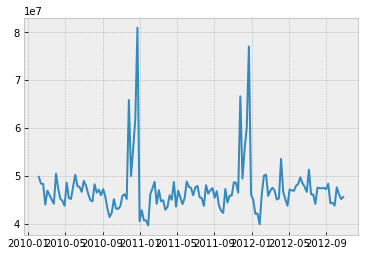

In [46]:
plt.plot(sales)

In [47]:
sales_log = np.log10(sales)

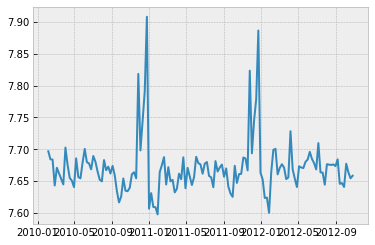

In [48]:
plt.plot(sales_log)

In [49]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_log)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.332826e+00
p-value                        2.878283e-08
#lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


In [50]:
sales.diff(1).head()

Date
2010-02-05           NaN
2010-02-12   -1414062.87
2010-02-19     -59683.85
2010-02-26   -4308422.65
2010-03-05    2902899.17
Name: Weekly_Sales, dtype: float64

In [51]:
sales_diff1 = sales.diff(1)
sales_diff1.dropna(inplace=True)

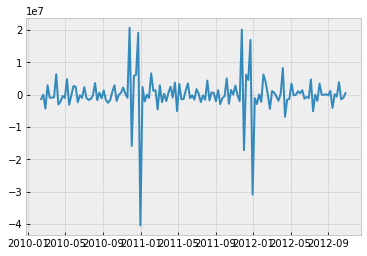

In [52]:
plt.plot(sales_diff1)

In [53]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.699469e+00
p-value                        3.922579e-09
#lags Used                     7.000000e+00
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64


In [54]:
sales_log_diff1 = sales_log.diff(1)
sales_log_diff1.dropna(inplace=True)

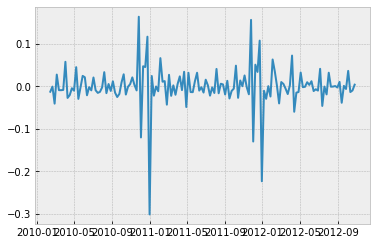

In [55]:
plt.plot(sales_log_diff1)

In [56]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_log_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


Results of Dickey-Fuller Test:
Test Statistic                -6.747059e+00
p-value                        3.016343e-09
#lags Used                     7.000000e+00
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64


In [57]:
sales_log_diff2 = sales_log.diff(2)
sales_log_diff2.dropna(inplace=True)

In [58]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_log_diff2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.558182e+00
p-value                        3.059679e-11
#lags Used                     4.000000e+00
Number of Observations Used    1.360000e+02
Critical Value (1%)           -3.479372e+00
Critical Value (5%)           -2.883037e+00
Critical Value (10%)          -2.578234e+00
dtype: float64


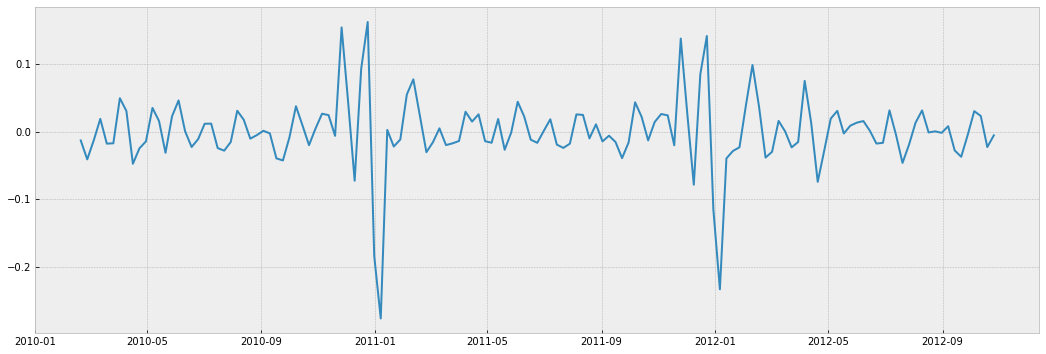

In [59]:
plt.figure(figsize=(18, 6))
plt.plot(sales_log_diff2)

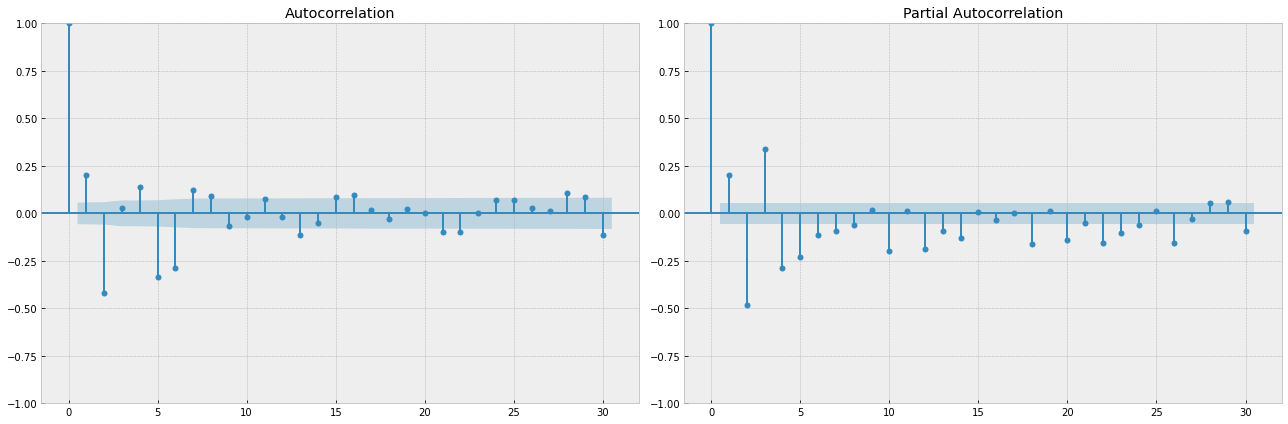

In [60]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(18)
fig.set_figheight(6)
smt.graphics.plot_acf(sales_log_diff2, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_log_diff2, lags=30, ax=axes[1], alpha=0.5,method='ols')
plt.tight_layout()

In [61]:
model = sm.tsa.statespace.SARIMAX(sales_log_diff2, order = (1,0,1), seasonal_order= (1,0,0,12),enforce_stationarity=False,enforce_invertibility=False)

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [62]:
results = model.fit()
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                        Weekly_Sales   No. Observations:                  141
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                 212.406
Date:                             Fri, 17 Mar 2023   AIC                           -416.812
Time:                                     03:37:56   BIC                           -405.404
Sample:                                 02-19-2010   HQIC                          -412.177
                                      - 10-26-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3654      0.063     -5.825      0.000      -0.488      -0.242
ma.L1          1.0000    15

In [63]:
p = q = range(0, 2)
d = range(0,2)
pdq = list(itertools.product(p, d, q))

In [64]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [65]:
D = range(0,2)
P = Q = range(0, 2) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [66]:
import sys
warnings.filterwarnings("ignore") 

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 model - AIC:-492.9714027202391


In [67]:
best_model = sm.tsa.statespace.SARIMAX(sales_log,order=(1, 1, 1),seasonal_order=(0, 0, 0, 12),enforce_stationarity=False,enforce_invertibility=False)
best_results = best_model.fit()

In [68]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 249.486
Date:                Fri, 17 Mar 2023   AIC                           -492.971
Time:                        03:46:50   BIC                           -484.146
Sample:                    02-05-2010   HQIC                          -489.385
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3754      0.048      7.742      0.000       0.280       0.470
ma.L1         -1.0000     44.929     -0.022      0.982     -89.059      87.059
sigma2         0.0016      0.072      0.022      0.9

In [69]:
sales

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
                 ...     
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: Weekly_Sales, Length: 143, dtype: float64

In [70]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-09-14'), full_results=True)

In [71]:
pred_dynamic.predicted_mean

2012-09-14    7.676189
2012-09-21    7.661498
2012-09-28    7.661865
2012-10-05    7.659419
2012-10-12    7.673239
2012-10-19    7.668168
2012-10-26    7.664475
Freq: W-FRI, Name: predicted_mean, dtype: float64

In [72]:
forecast=np.power(10, pred_dynamic.predicted_mean)

In [73]:
actual = sales['2012-09-14':]
actual

Date
2012-09-14    44226038.65
2012-09-21    44354547.11
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: Weekly_Sales, dtype: float64

In [74]:
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)

In [75]:
print('The Mean Absolute percentage error of our forecast for last two years is {}'.format(round(MAPE_last1year, 4)))

The Mean Absolute percentage error of our forecast for last two years is 0.0378


In [76]:
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 3507671745276.2573
The ROOT Mean Squared Error of our forecasts is 1872877.9312267678


In [77]:
np.power(10, best_results.forecast(steps=12))

2012-11-02    4.633928e+07
2012-11-09    4.664133e+07
2012-11-16    4.675521e+07
2012-11-23    4.679803e+07
2012-11-30    4.681411e+07
2012-12-07    4.682015e+07
2012-12-14    4.682242e+07
2012-12-21    4.682327e+07
2012-12-28    4.682359e+07
2013-01-04    4.682371e+07
2013-01-11    4.682376e+07
2013-01-18    4.682377e+07
Freq: W-FRI, Name: predicted_mean, dtype: float64

Forecast sales using the best fit ARIMA model
The next step is to predict weekly sales for next 12 weeks through the above model.

In [86]:
n_steps = 3
pred_uc_99 = best_results.get_forecast(steps=3, alpha=0.01)
pred_uc_95 = best_results.get_forecast(steps=3, alpha=0.05) 

pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [87]:
pred_ci_99.head()

,lower Weekly_Sales,upper Weekly_Sales
2012-11-02,7.587074,7.744824
2012-11-09,7.584329,7.753213
2012-11-16,7.584561,7.755099


In [88]:
pred_ci_95.head()

,lower Weekly_Sales,upper Weekly_Sales
2012-11-02,7.587074,7.744824
2012-11-09,7.584329,7.753213
2012-11-16,7.584561,7.755099


In [89]:
n_steps = 3
idx = pd.date_range(sales.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [90]:
fc_95.head()

,forecast,lower_ci_95,upper_ci_95
2012-11-01,4.633928e+07,3.864331e+07,5.556793e+07
2012-12-01,4.664133e+07,3.839977e+07,5.665172e+07
2013-01-01,4.675521e+07,3.842030e+07,5.689831e+07


In [91]:
fc_99.head()

,lower_ci_99,upper_ci_99
2012-11-01,3.864331e+07,5.556793e+07
2012-12-01,3.839977e+07,5.665172e+07
2013-01-01,3.842030e+07,5.689831e+07


In [92]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2012-11-01,4.633928e+07,3.864331e+07,5.556793e+07,3.864331e+07,5.556793e+07
2012-12-01,4.664133e+07,3.839977e+07,5.665172e+07,3.839977e+07,5.665172e+07
2013-01-01,4.675521e+07,3.842030e+07,5.689831e+07,3.842030e+07,5.689831e+07


In [93]:
pd.plotting.register_matplotlib_converters()

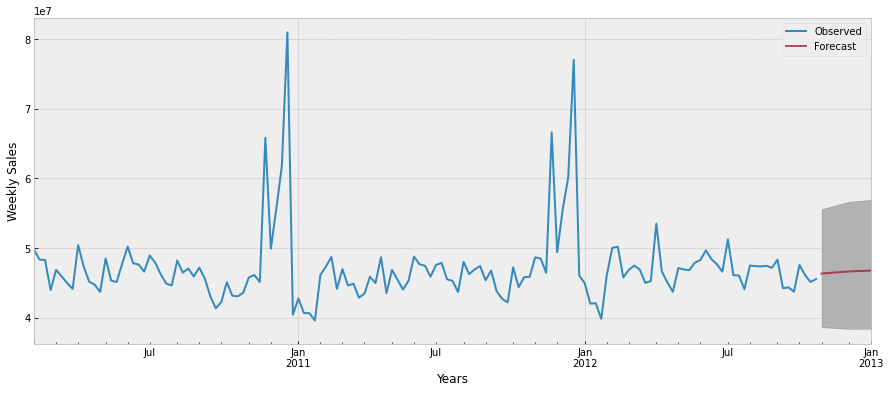

In [94]:
axis = sales.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Weekly Sales')
plt.legend(loc='best')
plt.show()

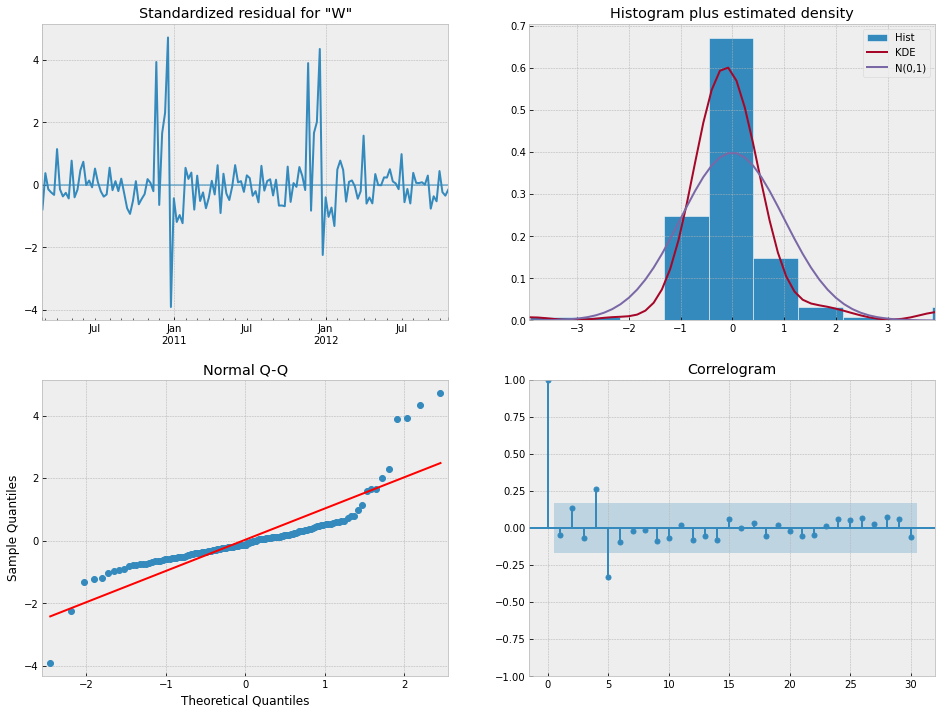

In [95]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

In [96]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
alpha = 0.4
beta = 0.2
gamma = 0.01
ets_model = ExponentialSmoothing(sales, trend='add', seasonal='add', seasonal_periods=12)
ets_fit = ets_model.fit(optimized=True)

In [97]:
p_ahead = 3
yh = ets_fit.forecast(p_ahead)

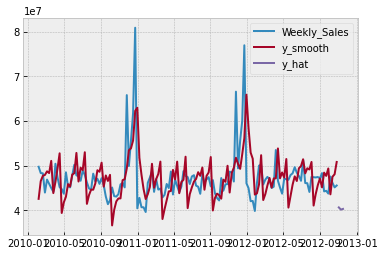

In [98]:
plt.plot(sales, label='Weekly_Sales')
plt.plot(ets_fit.fittedvalues, label='y_smooth')
plt.plot(yh, label='y_hat')
plt.legend()
plt.show()